<a href="https://colab.research.google.com/github/solomonmelwin/CODSOFT/blob/main/update1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow


In [2]:
from google.colab import files
files.upload()  # Manually upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"solomonmelwin2002","key":"ae9ec59b0eef4408f540fe925d233805"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle


In [4]:
!kaggle datasets download -d solomonmelwin2002/waterbirds
!unzip -q /content/waterbirds.zip -d /content/bird-dataset


Dataset URL: https://www.kaggle.com/datasets/solomonmelwin2002/waterbirds
License(s): CC0-1.0
 98% 474M/483M [00:05<00:00, 100MB/s] 
100% 483M/483M [00:05<00:00, 94.5MB/s]


In [5]:
import os
import shutil
import random

# Paths
dataset_path = "/content/bird-dataset/waterbirds"  # Change this to your dataset path
output_path = "/content/bird-dataset-split"  # Output path for split dataset

# Train-Test-Val Split Ratios
train_ratio = 0.70
test_ratio = 0.15
val_ratio = 0.15

# Ensure output directories exist
for split in ["train", "test", "val"]:
    os.makedirs(os.path.join(output_path, split), exist_ok=True)

# Process each species
for species in os.listdir(dataset_path):
    species_path = os.path.join(dataset_path, species)
    if not os.path.isdir(species_path):
        continue  # Skip if not a directory

    images = os.listdir(species_path)
    random.shuffle(images)  # Shuffle images randomly

    # Split indices
    train_split = int(len(images) * train_ratio)
    test_split = train_split + int(len(images) * test_ratio)

    # Assign images to respective splits
    splits = {
        "train": images[:train_split],
        "test": images[train_split:test_split],
        "val": images[test_split:]
    }

    # Move images to respective folders
    for split, img_list in splits.items():
        species_split_path = os.path.join(output_path, split, species)
        os.makedirs(species_split_path, exist_ok=True)  # Create species folder

        for img in img_list:
            src_path = os.path.join(species_path, img)
            dst_path = os.path.join(species_split_path, img)
            shutil.copy(src_path, dst_path)  # Copy image

print("✅ Dataset successfully split into Train (70%), Test (15%), and Val (15%)!")


✅ Dataset successfully split into Train (70%), Test (15%), and Val (15%)!


In [6]:
import os

output_path = "/content/bird-dataset-split"  # Change this if needed

for split in ["train", "test", "val"]:
    total_images = 0
    print(f"\n🔍 Checking '{split}' split:")

    for species in os.listdir(os.path.join(output_path, split)):
        species_path = os.path.join(output_path, split, species)
        num_images = len(os.listdir(species_path))
        total_images += num_images
        print(f"  📌 {species}: {num_images} images")

    print(f"✅ Total images in {split}: {total_images}")



🔍 Checking 'train' split:
  📌 painted stork: 940 images
  📌 Green-winged Teal: 939 images
  📌 eurasian spoonbill: 940 images
  📌 Eurasian Wigeon: 940 images
  📌 Northern Shoveler: 939 images
  📌 Bar-headed Goose: 940 images
  📌 Knob-billed Duck: 938 images
  📌 glossy ibis: 940 images
  📌 spot billed pelican: 940 images
  📌 Graganey: 939 images
  📌 greater flamingo: 938 images
  📌 Northern Pintail: 939 images
  📌 Common Pochard: 940 images
  📌 great white pelican: 940 images
  📌 asian openbill: 884 images
  📌 Fulvous Whistling Duck: 937 images
  📌 Indian Spot-billed Duck: 939 images
  📌 Tufted Duck: 939 images
  📌 Lesser Whistling Duck: 940 images
  📌 black headed ibis: 940 images
✅ Total images in train: 18731

🔍 Checking 'test' split:
  📌 painted stork: 201 images
  📌 Green-winged Teal: 201 images
  📌 eurasian spoonbill: 201 images
  📌 Eurasian Wigeon: 201 images
  📌 Northern Shoveler: 201 images
  📌 Bar-headed Goose: 201 images
  📌 Knob-billed Duck: 201 images
  📌 glossy ibis: 201 i

📌 Train Set Samples:


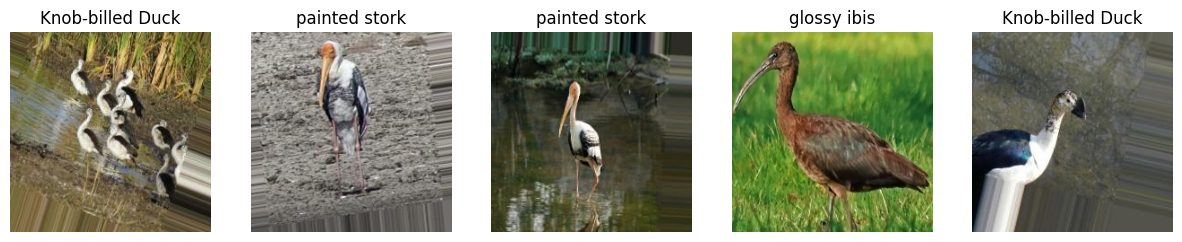


📌 Test Set Samples:


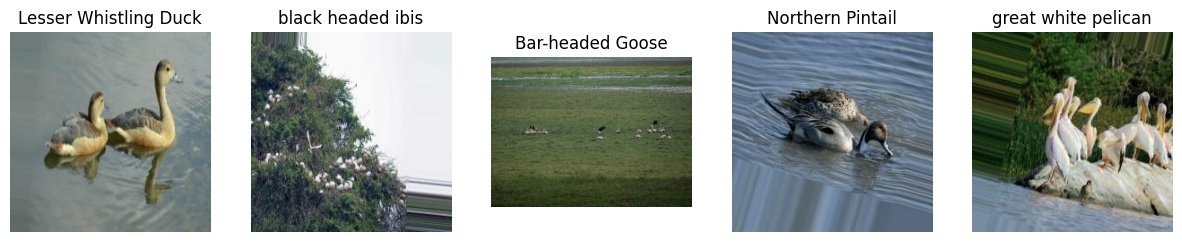


📌 Validation Set Samples:


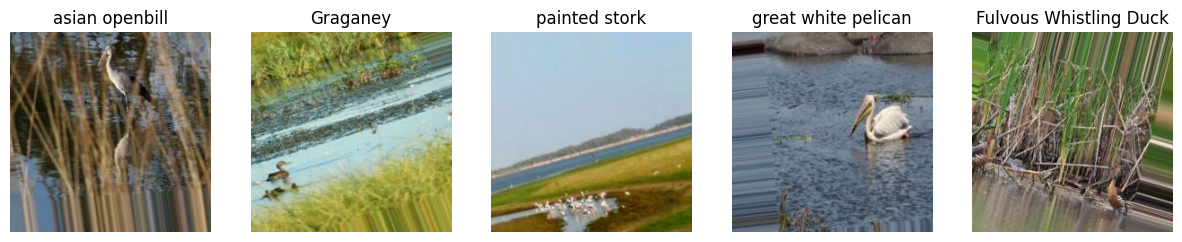

In [7]:
import matplotlib.pyplot as plt
import random
from PIL import Image

def show_random_images(split, num_images=5):
    split_path = os.path.join(output_path, split)
    species_list = os.listdir(split_path)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        species = random.choice(species_list)
        species_path = os.path.join(split_path, species)
        image_name = random.choice(os.listdir(species_path))
        image_path = os.path.join(species_path, image_name)

        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].axis("off")
        axes[i].set_title(species)

    plt.show()

# Show images from each split
print("📌 Train Set Samples:")
show_random_images("train")

print("\n📌 Test Set Samples:")
show_random_images("test")

print("\n📌 Validation Set Samples:")
show_random_images("val")


In [8]:
import cv2
import os
import shutil
import numpy as np

dataset_path = "/content/bird-dataset-split"  # Change this to your dataset path
blurry_threshold = 100  # Lower = more blur removed

def is_blurry(image_path, threshold=blurry_threshold):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    laplacian_var = cv2.Laplacian(image, cv2.CV_64F).var()  # Compute variance
    return laplacian_var < threshold  # True if blurry

def remove_blurry_images(folder):
    removed = 0
    for root, _, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            if is_blurry(file_path):
                os.remove(file_path)  # Delete blurry image
                removed += 1
    print(f"✅ Removed {removed} blurry images from {folder}")

# Run on all splits
for split in ["train", "test", "val"]:
    remove_blurry_images(os.path.join(dataset_path, split))


✅ Removed 1113 blurry images from /content/bird-dataset-split/train
✅ Removed 219 blurry images from /content/bird-dataset-split/test
✅ Removed 247 blurry images from /content/bird-dataset-split/val


In [9]:
def is_noisy(image_path, noise_threshold=600):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 100, 200)  # Detect edges
    noise_score = np.sum(edges) / (image.shape[0] * image.shape[1])  # Edge density

    return noise_score > noise_threshold  # True if noisy

def remove_noisy_images(folder):
    removed = 0
    for root, _, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            if is_noisy(file_path):
                os.remove(file_path)
                removed += 1
    print(f"✅ Removed {removed} noisy images from {folder}")

# Run on all splits
for split in ["train", "test", "val"]:
    remove_noisy_images(os.path.join(dataset_path, split))


✅ Removed 0 noisy images from /content/bird-dataset-split/train
✅ Removed 0 noisy images from /content/bird-dataset-split/test
✅ Removed 0 noisy images from /content/bird-dataset-split/val


In [10]:
def is_distant(image_path, size_threshold=5000):  # Adjust size threshold as needed
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    _, thresh = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    max_area = max([cv2.contourArea(c) for c in contours], default=0)  # Largest detected object

    return max_area < size_threshold  # True if object is too small

def remove_distant_images(folder):
    removed = 0
    for root, _, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            if is_distant(file_path):
                os.remove(file_path)
                removed += 1
    print(f"✅ Removed {removed} distant images from {folder}")

# Run on all splits
for split in ["train", "test", "val"]:
    remove_distant_images(os.path.join(dataset_path, split))


✅ Removed 3431 distant images from /content/bird-dataset-split/train
✅ Removed 792 distant images from /content/bird-dataset-split/test
✅ Removed 726 distant images from /content/bird-dataset-split/val


In [11]:
import os
import hashlib
from PIL import Image

dataset_path = "/content/bird-dataset-split"  # Change to your dataset path
hashes = {}  # Dictionary to store image hashes

def compute_hash(image_path):
    """Compute SHA-256 hash of an image."""
    with Image.open(image_path) as img:
        img = img.convert("L").resize((128, 128))  # Convert to grayscale and resize
        return hashlib.sha256(img.tobytes()).hexdigest()

def remove_duplicates(folder):
    removed = 0
    for root, _, files in os.walk(folder):
        for file in files:
            file_path = os.path.join(root, file)
            img_hash = compute_hash(file_path)

            if img_hash in hashes:
                os.remove(file_path)  # Delete duplicate
                removed += 1
            else:
                hashes[img_hash] = file_path  # Store hash

    print(f"✅ Removed {removed} duplicate images from {folder}")

# Run on all splits
for split in ["train", "test", "val"]:
    remove_duplicates(os.path.join(dataset_path, split))


✅ Removed 1 duplicate images from /content/bird-dataset-split/train
✅ Removed 1 duplicate images from /content/bird-dataset-split/test
✅ Removed 0 duplicate images from /content/bird-dataset-split/val


In [12]:
for split in ["train", "test", "val"]:
    total_images = sum(len(files) for _, _, files in os.walk(os.path.join(dataset_path, split)))
    print(f"✅ Remaining images in {split}: {total_images}")


✅ Remaining images in train: 14186
✅ Remaining images in test: 2996
✅ Remaining images in val: 3055


In [13]:
import os
from collections import Counter
from PIL import Image

dataset_path = "/content/bird-dataset-split"
splits = ['train', 'val', 'test']

for split in splits:
    class_counts = Counter()
    corrupted_images = []
    print(f"\nChecking {split} set...")

    split_path = os.path.join(dataset_path, split)
    for bird_class in os.listdir(split_path):
        class_path = os.path.join(split_path, bird_class)
        if not os.path.isdir(class_path):
            continue  # Skip non-folder files

        images = os.listdir(class_path)
        class_counts[bird_class] = len(images)

        # Check for corrupted images
        for img_file in images:
            img_path = os.path.join(class_path, img_file)
            try:
                img = Image.open(img_path)
                img.verify()  # Verify image integrity
            except Exception:
                corrupted_images.append(img_path)

    print("✅ Class distribution:", class_counts)
    if corrupted_images:
        print("❌ Corrupted images found:", corrupted_images)
    else:
        print("✅ No corrupted images detected!")



Checking train set...
✅ Class distribution: Counter({'glossy ibis': 813, 'Green-winged Teal': 772, 'Fulvous Whistling Duck': 766, 'Lesser Whistling Duck': 759, 'Northern Shoveler': 751, 'eurasian spoonbill': 746, 'Graganey': 743, 'Common Pochard': 740, 'Eurasian Wigeon': 738, 'Indian Spot-billed Duck': 721, 'spot billed pelican': 709, 'great white pelican': 706, 'painted stork': 703, 'Northern Pintail': 694, 'Tufted Duck': 683, 'Knob-billed Duck': 670, 'greater flamingo': 645, 'Bar-headed Goose': 635, 'asian openbill': 604, 'black headed ibis': 588})
✅ No corrupted images detected!

Checking val set...
✅ Class distribution: Counter({'glossy ibis': 183, 'Green-winged Teal': 166, 'Common Pochard': 166, 'Fulvous Whistling Duck': 164, 'eurasian spoonbill': 163, 'Lesser Whistling Duck': 161, 'spot billed pelican': 160, 'Indian Spot-billed Duck': 158, 'Northern Shoveler': 157, 'Eurasian Wigeon': 155, 'Graganey': 152, 'Knob-billed Duck': 150, 'great white pelican': 150, 'Northern Pintail': 1

In [104]:
!pip install keras-cv --upgrade

import tensorflow as tf
import keras_cv
import numpy as np
import os

# Check TensorFlow version and GPU availability
print("✅ TensorFlow Version:", tf.__version__)
print("✅ GPU Available:", "Yes" if tf.config.list_physical_devices('GPU') else "No")


✅ TensorFlow Version: 2.18.0
✅ GPU Available: Yes


In [105]:
# Define dataset path
dataset_path = "/content/bird-dataset-split"

batch_size = 32
img_size = (224, 224)

# Load train, validation, and test datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    f"{dataset_path}/train",
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    f"{dataset_path}/val",
    shuffle=True,
    batch_size=batch_size,
    image_size=img_size
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    f"{dataset_path}/test",
    shuffle=False,
    batch_size=batch_size,
    image_size=img_size
)

# Check class names
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"✅ Classes Loaded: {class_names}")


Found 14186 files belonging to 20 classes.
Found 3055 files belonging to 20 classes.
Found 2996 files belonging to 20 classes.
✅ Classes Loaded: ['Bar-headed Goose', 'Common Pochard', 'Eurasian Wigeon', 'Fulvous Whistling Duck', 'Graganey', 'Green-winged Teal', 'Indian Spot-billed Duck', 'Knob-billed Duck', 'Lesser Whistling Duck', 'Northern Pintail', 'Northern Shoveler', 'Tufted Duck', 'asian openbill', 'black headed ibis', 'eurasian spoonbill', 'glossy ibis', 'great white pelican', 'greater flamingo', 'painted stork', 'spot billed pelican']


In [106]:
# Function to ensure labels are one-hot encoded BEFORE augmentation
def prepare_labels(images, labels):
    labels = tf.one_hot(tf.cast(labels, tf.int32), depth=num_classes)  # ✅ One-hot encoding here
    return images, labels


In [107]:
# Apply correct label processing to datasets
train_dataset = train_dataset.map(prepare_labels, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset = val_dataset.map(prepare_labels, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(prepare_labels, num_parallel_calls=tf.data.AUTOTUNE)

print("✅ Labels are now one-hot encoded before augmentation.")


✅ Labels are now one-hot encoded before augmentation.


In [108]:
# Create Mixup & CutMix Layers
mixup_layer = keras_cv.layers.MixUp(alpha=0.2)
cutmix_layer = keras_cv.layers.CutMix(alpha=0.2)

# Function to apply Mixup and CutMix
def augment(images, labels):
    # ✅ Labels are already one-hot encoded before this step
    augmented = mixup_layer({"images": images, "labels": labels})
    images, labels = augmented["images"], augmented["labels"]

    augmented = cutmix_layer({"images": images, "labels": labels})
    images, labels = augmented["images"], augmented["labels"]

    return images, labels


In [109]:
# Apply augmentation only to training dataset
train_dataset = train_dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
print("✅ Successfully applied Mixup & CutMix!")


✅ Successfully applied Mixup & CutMix!


In [110]:
for images, labels in train_dataset.take(1):
    print("✅ Image Shape:", images.shape)  # Should be (batch_size, 224, 224, 3)
    print("✅ Label Shape:", labels.shape)  # Should be (batch_size, 20)


✅ Image Shape: (32, 224, 224, 3)
✅ Label Shape: (32, 20)


In [111]:
# Load MobileNetV3 Small with ImageNet weights
base_model = tf.keras.applications.MobileNetV3Small(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

# Freeze the base model (train only new layers first)
base_model.trainable = False

# Build final model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # 20 bird species
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",  # ✅ Works correctly with one-hot labels
    metrics=["accuracy"]
)

# Show model summary
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)        │ (None, 7, 7, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 20)                  │           5,140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,091,972 (4.17 MB)

 Trainable params: 152,852 (597.08 KB)

 Non-trainable params: 939,120 (3.58 MB)

In [112]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    batch_size=batch_size
)

# Save model checkpoint after first phase
model.save("mobilenetv3_frozen.h5")
print("✅ Model trained with frozen layers & saved!")


Epoch 1/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 56s 106ms/step - accuracy: 0.2037 - loss: 2.7502 - val_accuracy: 0.4900 - val_loss: 1.6874
Epoch 2/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 37s 83ms/step - accuracy: 0.3479 - loss: 2.3457 - val_accuracy: 0.5676 - val_loss: 1.5149
Epoch 3/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.3822 - loss: 2.2730 - val_accuracy: 0.5941 - val_loss: 1.4182
Epoch 4/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.4076 - loss: 2.2162 - val_accuracy: 0.5987 - val_loss: 1.3526
Epoch 5/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 41s 76ms/step - accuracy: 0.4181 - loss: 2.1953 - val_accuracy: 0.6390 - val_loss: 1.2858
Epoch 6/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 36s 82ms/step - accuracy: 0.4259 - loss: 2.1658 - val_accuracy: 0.6347 - val_loss: 1.2637
Epoch 7/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 39s 78ms/step - accuracy: 0.4430 - loss: 2.1274 - val_accuracy: 0.6658 - val_loss: 1.1740
Epoch 8/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 35s 78ms/step - accuracy: 0.4483 - loss: 2.1250 -

✅ Model trained with frozen layers & saved!


In [113]:
# Unfreeze the last 10 layers for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile again with lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # 🔥 Lower LR for stable fine-tuning
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("✅ Model is now ready for fine-tuning!")


✅ Model is now ready for fine-tuning!


In [114]:
# Train again with fine-tuning
history_fine_tune = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,  # Start with 10 more epochs
    batch_size=batch_size
)

# Save the fine-tuned model
model.save("mobilenetv3_fine_tuned.keras")
print("✅ Fine-tuned model saved successfully!")


Epoch 1/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 56s 100ms/step - accuracy: 0.4526 - loss: 2.1063 - val_accuracy: 0.7034 - val_loss: 1.0415
Epoch 2/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 36s 80ms/step - accuracy: 0.4718 - loss: 2.0628 - val_accuracy: 0.7221 - val_loss: 0.9777
Epoch 3/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 42s 82ms/step - accuracy: 0.4789 - loss: 2.0420 - val_accuracy: 0.7319 - val_loss: 0.9497
Epoch 4/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.5077 - loss: 1.9891 - val_accuracy: 0.7414 - val_loss: 0.9112
Epoch 5/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - accuracy: 0.5058 - loss: 1.9870 - val_accuracy: 0.7493 - val_loss: 0.8874
Epoch 6/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - accuracy: 0.5029 - loss: 2.0064 - val_accuracy: 0.7679 - val_loss: 0.8647
Epoch 7/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 0.5185 - loss: 1.9516 - val_accuracy: 0.7712 - val_loss: 0.8388
Epoch 8/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 36s 82ms/step - accuracy: 0.5239 - loss: 1.9458 -

In [115]:
def tta_predict(model, img):
    img = tf.expand_dims(img, axis=0)  # Convert to batch format

    # Create different augmented versions
    augmentations = [
        img,
        tf.image.flip_left_right(img),
        tf.image.adjust_brightness(img, 0.1),
        tf.image.rot90(img, k=1),
        tf.image.rot90(img, k=3)
    ]

    preds = [model.predict(tf.expand_dims(a, axis=0)) for a in augmentations]
    avg_pred = tf.reduce_mean(preds, axis=0)  # Average predictions
    return avg_pred


In [116]:
# Load ResNet50 model
resnet_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
resnet_model.trainable = False  # Freeze ResNet layers

# Merge MobileNetV3 and ResNet50 outputs
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
mobilenet_features = base_model(input_layer, training=False)
resnet_features = resnet_model(input_layer, training=False)

merged = tf.keras.layers.Concatenate()([mobilenet_features, resnet_features])
merged = tf.keras.layers.GlobalAveragePooling2D()(merged)
merged = tf.keras.layers.Dense(256, activation="relu")(merged)
merged = tf.keras.layers.Dropout(0.3)(merged)
output_layer = tf.keras.layers.Dense(num_classes, activation="softmax")(merged)

ensemble_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [118]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.arange(num_classes),  # ✅ FIX: Use class indices instead of `.class_names`
    y=np.concatenate([y.numpy().argmax(axis=-1) for _, y in train_dataset], axis=0)  # ✅ Ensure labels are integers
)

# Convert to dictionary
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("✅ Computed Class Weights:", class_weight_dict)


✅ Computed Class Weights: {0: 1.1312599681020734, 1: 1.0032531824611033, 2: 0.9585135135135135, 3: 0.9140463917525773, 4: 0.9508042895442359, 5: 0.9962078651685393, 6: 1.0032531824611033, 7: 1.0570789865871832, 8: 0.8724477244772447, 9: 1.0539375928677563, 10: 0.9729766803840878, 11: 1.0666165413533835, 12: 1.2357142857142858, 13: 1.188107202680067, 14: 0.9650340136054422, 15: 0.8266899766899767, 16: 0.9432180851063829, 17: 1.0746969696969697, 18: 0.9650340136054422, 19: 1.0004231311706628}


In [119]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    batch_size=batch_size,
    class_weight=class_weight_dict  # 🔥 Class weighting applied
)


Epoch 1/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.5340 - loss: 1.9377 - val_accuracy: 0.7931 - val_loss: 0.7808
Epoch 2/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 71s 77ms/step - accuracy: 0.5295 - loss: 1.9276 - val_accuracy: 0.8098 - val_loss: 0.7550
Epoch 3/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 36s 80ms/step - accuracy: 0.5495 - loss: 1.8907 - val_accuracy: 0.8052 - val_loss: 0.7532
Epoch 4/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - accuracy: 0.5527 - loss: 1.8884 - val_accuracy: 0.8085 - val_loss: 0.7473
Epoch 5/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.5597 - loss: 1.8820 - val_accuracy: 0.8111 - val_loss: 0.7343
Epoch 6/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 43s 79ms/step - accuracy: 0.5611 - loss: 1.8479 - val_accuracy: 0.8200 - val_loss: 0.7058
Epoch 7/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 34s 77ms/step - accuracy: 0.5607 - loss: 1.8506 - val_accuracy: 0.8223 - val_loss: 0.7071
Epoch 8/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 34s 77ms/step - accuracy: 0.5648 - loss: 1.8626 - 

In [120]:
def tta_predict(model, img):
    img = tf.expand_dims(img, axis=0)  # Convert to batch format

    augmentations = [
        img,
        tf.image.flip_left_right(img),
        tf.image.adjust_brightness(img, 0.1),
        tf.image.rot90(img, k=1),
        tf.image.rot90(img, k=3)
    ]

    preds = [model.predict(tf.expand_dims(a, axis=0)) for a in augmentations]
    avg_pred = tf.reduce_mean(preds, axis=0)  # Average predictions
    return avg_pred


In [121]:
history_more_epochs = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,  # Start with 5 more epochs
    batch_size=batch_size,
    class_weight=class_weight_dict  # Keep class weighting
)


Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 36s 80ms/step - accuracy: 0.5714 - loss: 1.8364 - val_accuracy: 0.8337 - val_loss: 0.6616
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 39s 76ms/step - accuracy: 0.5736 - loss: 1.8261 - val_accuracy: 0.8442 - val_loss: 0.6425
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 44s 84ms/step - accuracy: 0.5713 - loss: 1.8429 - val_accuracy: 0.8488 - val_loss: 0.6410
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 35s 78ms/step - accuracy: 0.5777 - loss: 1.8214 - val_accuracy: 0.8478 - val_loss: 0.6305
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 37s 84ms/step - accuracy: 0.5825 - loss: 1.8034 - val_accuracy: 0.8458 - val_loss: 0.6218


In [122]:
# Load ResNet50
resnet_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
resnet_model.trainable = False  # Freeze layers

# Merge MobileNetV3 and ResNet50 outputs
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
mobilenet_features = base_model(input_layer, training=False)
resnet_features = resnet_model(input_layer, training=False)

merged = tf.keras.layers.Concatenate()([mobilenet_features, resnet_features])
merged = tf.keras.layers.GlobalAveragePooling2D()(merged)
merged = tf.keras.layers.Dense(256, activation="relu")(merged)
merged = tf.keras.layers.Dropout(0.3)(merged)
output_layer = tf.keras.layers.Dense(num_classes, activation="softmax")(merged)

ensemble_model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
ensemble_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


In [123]:
loss, accuracy = model.evaluate(test_dataset)
print(f"✅ Final Test Accuracy: {accuracy * 100:.2f}% | Test Loss: {loss:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.8440 - loss: 0.6207
✅ Final Test Accuracy: 85.65% | Test Loss: 0.5757


In [124]:
model.save("final_bird_classifier.keras")  # Recommended format
print("✅ Model saved successfully!")


✅ Model saved successfully!


In [125]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("bird_classifier.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Model converted to TFLite for mobile deployment!")


Saved artifact at '/tmp/tmp9y0cz372'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_1623')
Output Type:
  TensorSpec(shape=(None, 20), dtype=tf.float32, name=None)
Captures:
  140130690405520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140130690407632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140130690407824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140130690406864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140130690406288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140130690408784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140130690408208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140130690402256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140130690408976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140130690407056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14013069

In [126]:
def tta_predict(model, img):
    img = tf.expand_dims(img, axis=0)

    augmentations = [
        img,
        tf.image.flip_left_right(img),
        tf.image.adjust_brightness(img, 0.1),
        tf.image.rot90(img, k=1),
        tf.image.rot90(img, k=3)
    ]

    preds = [model.predict(tf.expand_dims(a, axis=0)) for a in augmentations]
    avg_pred = tf.reduce_mean(preds, axis=0)
    return avg_pred


In [127]:
import numpy as np

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot to class indices
    y_pred.extend(np.argmax(preds, axis=1))  # Get highest predicted class

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("✅ Predictions & Ground Truth Collected!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━

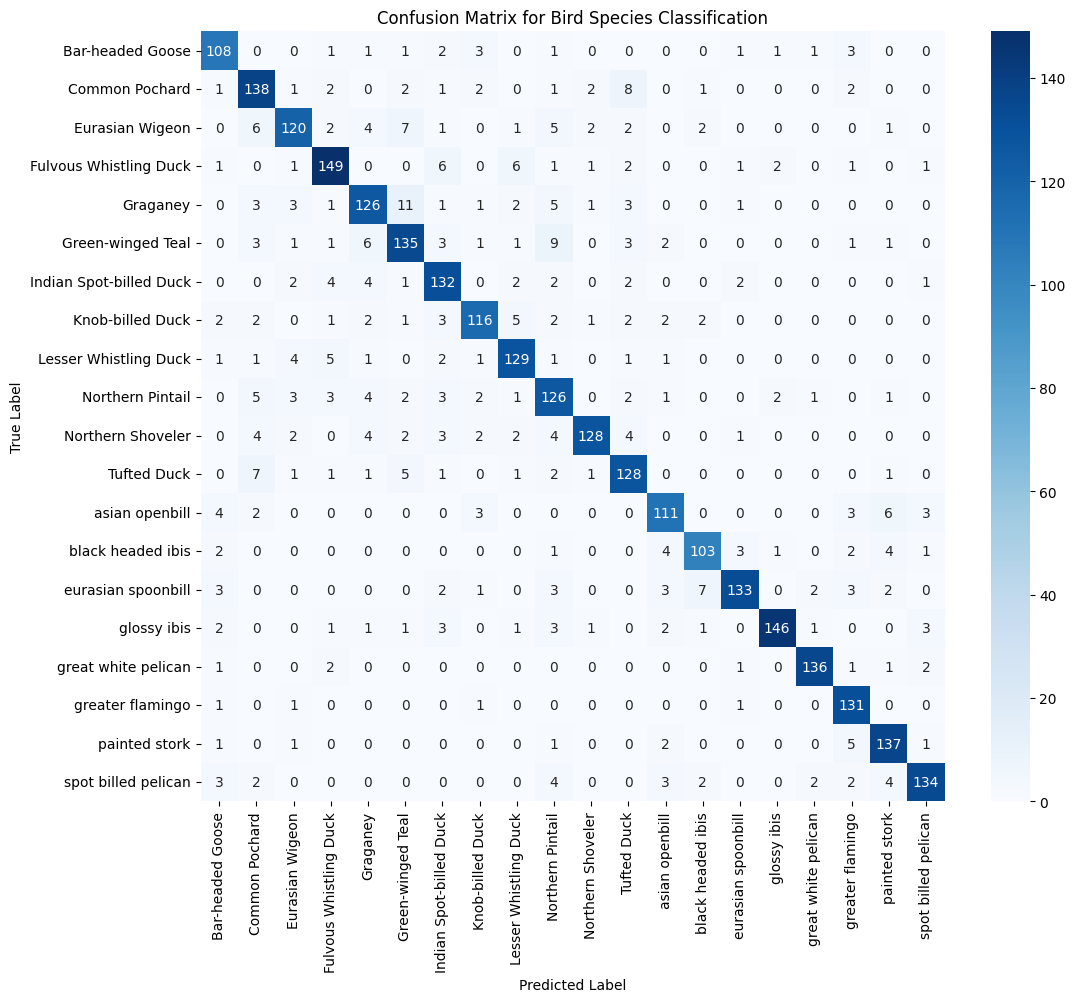

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Bird Species Classification")
plt.show()
